In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', ticks=True, grid=False)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

import requests
import tweepy

# Gather  Data
In this section, I will try to import the data provided by udacity in 3 different ways :
- Import csv file
- Import tsv file through Udacity's server
- Import tweets from twitter page using Tweepy API

## Import csv file

In [2]:
# Import .csv file directly to df_csv
df_csv = pd.read_csv("twitter-archive-enhanced.csv")
df_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Import TSV file through Udacity's server

In [3]:
# Get TSV File's URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# Write file as 'image-predictions.tsv'
with open('image-prediction.tsv', 'wb') as f:
    f.write(r.content)
    
# Read 'image-prediction.tsv' and assign it to df_tsv
df_tsv = pd.read_csv("image-prediction.tsv",sep="\t")
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Import tweets from twitter page using Tweepy API

In [4]:
"""import tweepy
from tweepy import OAuthHandler
import json

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_csv.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
print(fails_dict)"""

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_csv.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n 

In [5]:
# Read .txt file created from tweepy
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

In [6]:
# Assign json list into df_json
df_json = pd.DataFrame(status)
df_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7613,35901,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,5637,30964,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3729,23303,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7777,39165,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8384,37416,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


# Assess Data
All the data has been imported. But before we discuss about how we assess the data, let's talk about the key points here about Data Wrangling. Key points to keep in mind when data wrangling for this project:
 - You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
 - Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
 - Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
 - You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.  

Here, I'm going to do 2 steps of assessment :
 - Assess data completeness & tidiness
 - Assess data cleanliness

## Assess data completeness  & tidiness
Let's find out whether there are missing values, untidy dataframe.

### df_csv dataframe

In [7]:
df_csv.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1956,673612854080196609,NaN,NaN,2015-12-06 21:19:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffri. He's a speckled ice pupper. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,None,None,pupper,None
478,815966073409433600,NaN,NaN,2017-01-02 17:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with squeaky hiccups. Please e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815966073...,13,10,None,None,None,pupper,None
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [8]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Look at `doggo`, `floofer`, `pupper`, `puppo` columns. Maybe they are actually categorical value and can be combined into one column

In [9]:
print(df_csv['doggo'].value_counts())
print(df_csv['floofer'].value_counts())
print(df_csv['pupper'].value_counts())
print(df_csv['puppo'].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


So, they are just marking that dog as `doggo`, `floofer`, `pupper`, and `puppo` which considered as categorical column.

### df_tsv dataframe

In [10]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


I don't see any completeness problem in this dataframe. But, what about the other dataframes? Look at the amount of rows on every dataframe below

In [11]:
print("df_csv rows : ", len(df_csv))
print("df_tsv rows : ", len(df_tsv))
print("df_json rows : ", len(df_json))

df_csv rows :  2356
df_tsv rows :  2075
df_json rows :  2330


That mean we could match the amount of rows because of the missing values. This could be done by joining all these the tweet_id. But before that, let's check out `df_json` first.

### df_json dataframe

In [12]:
df_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7613,35901,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,5637,30964,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3729,23303,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7777,39165,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8384,37416,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [13]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   int64  
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   bool   
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2058 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

It seems that `df_json` is actually `df_csv` but unprocessed (by the previous person who created the .csv file). I'm gonna leave `df_json`, and focus on `df_csv` and `df_tsv`

### Checking if joining `df_json` and `df_tsv` is possible

Okay it looks like I'm going to join `df_csv` and `df_tsv` dataframes. But I must find whether joining those two are possible by matching `tweet_id` column. I'm going to inner join those two and check the rows of joined dataframe

In [14]:
len(df_tsv.merge(df_csv,on='tweet_id',how='inner'))

2075

After I merge `df_csv` and `df_tsv`, the rows of merged dataframe would be 2058. Therefore, I can merge them into one dataframe.

In [15]:
df_merged = df_csv.merge(df_tsv,on='tweet_id',how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

Now `df_merged` has a lot of columns. Cleaning columns can be done in the next section

## Assess data cleanliness  
Because all dataframes is now merged, I'm going to asses `df_merged` only

### Finding Retweets

In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

Some columns do have missing values here. But I'm curious about this `retweeted_status_id` column. I'm wondering when this column isn't null, then that tweet must be a retweet and not an original tweet. Let's find it out below here

In [17]:
df_merged[df_merged['retweeted_status_id'].notnull()]['text']

19      RT @dog_rates: This is Canela. She attempted s...
33      RT @dog_rates: This is Lilly. She just paralle...
68      RT @rachel2195: @dog_rates the boyfriend and h...
82      RT @dog_rates: This is Walter. He won't start ...
110     RT @rachaeleasler: these @dog_rates hats are 1...
                              ...                        
759     RT @dog_rates: This is Rubio. He has too much ...
777     RT @dog_rates: Everyone needs to watch this. 1...
1037    RT @twitter: @dog_rates Awesome Tweet! 12/10. ...
1979    RT @dogratingrating: Exceptional talent. Origi...
1980    RT @dogratingrating: Unoriginal idea. Blatant ...
Name: text, Length: 81, dtype: object

Let's confirm it by checking the other rows that doesn't have `retweeted_status_id` values

In [18]:
df_merged[df_merged['retweeted_status_id'].isna()]['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2070    Here we have a 1949 1st generation vulpix. Enj...
2071    This is a purebred Piers Morgan. Loves to Netf...
2072    Here is a very happy pup. Big fan of well-main...
2073    This is a western brown Mitsubishi terrier. Up...
2074    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 1994, dtype: object

So we found out that those rows having `retweeted_status_id` values are retweets. We can delete those rows as we don't need it according to the Key Points.

### Finding Replies  
This case is similar to finding retweets. I'm suspecting that rows containing `in_reply_to_status_id` is replying to another tweet, and not an original tweet. Let's confirm it the same way as before

In [19]:
df_merged[df_merged['in_reply_to_status_id'].notnull()]['text']

124     Ladies and gentlemen... I found Pipsy. He may ...
153     THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...
202     PUPDATE: I'm proud to announce that Toby is 23...
458     Like doggo, like pupper version 2. Both 11/10 ...
834     PUPDATE: can't see any. Even if I could, I cou...
                              ...                        
1611    Ok last one of these. I may try to make some m...
1614    I have found another. 13/10 https://t.co/HwroP...
1621    Just received another perfect photo of dogs an...
1760    I'm just going to leave this one here as well....
1891    This is Tessa. She is also very pleased after ...
Name: text, Length: 23, dtype: object

To be honest, I'm not a Twitter user. I can't make sure yet if those are replies to another tweet. Let's open one of the tweet above

In [20]:
df_merged[df_merged['in_reply_to_status_id'].notnull()]['tweet_id']

124     863079547188785154
153     856526610513747968
202     844979544864018432
458     802265048156610565
834     746906459439529985
               ...        
1611    674999807681908736
1614    674793399141146624
1621    674754018082705410
1760    671729906628341761
1891    669353438988365824
Name: tweet_id, Length: 23, dtype: int64

I'm taking 863079547188785154 id to find the tweet.  
Take a look at this <a href="https://twitter.com/dog_rates/status/863079547188785154">link</a>. I put a screenshot below to make sure that the above tweet is a reply
![tweet replies](tweet-replies.PNG "Title")  
As you can see, this is a reply tweets. We can remove those rows

### Finding columns that have less than 10% of total rows  
If I check the column information of `df_merged`, there are columns with null or very few values. Let's find which columns that mostly null values

In [21]:
all_columns = df_merged.columns
cols_to_drop = []
for column in all_columns:
    null_counts = df_merged[column].notnull().sum()
    if(null_counts < (len(df_merged)*0.1)):
        cols_to_drop.append(column)
cols_to_drop

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp']

The above columns can be dropped as we might don't need it in the future

### Checking dog names  
Let's check the name of the dogs

In [22]:
df_merged['name'].value_counts()

None       578
a           55
Charlie     11
Lucy        10
Cooper      10
          ... 
Aldrick      1
Chef         1
Colin        1
Herb         1
Marq         1
Name: name, Length: 936, dtype: int64

There are dogs called 'a'. This might be a typo from the input. Let's check the tweet 

In [23]:
df_merged[df_merged['name']=='a']['text'].head()

51     Here is a pupper approaching maximum borkdrive...
525    Here is a perfect example of someone who has t...
648    Guys this is getting so out of hand. We only r...
824    This is a mighty rare blue-tailed hammer sherk...
826    Viewer discretion is advised. This is a terrib...
Name: text, dtype: object

So the previous scraper scraped 'a' as the name. I don't see there is any name in the text. Let's change the value 'a' to None

### Assess data type consistency  
Let's find out the `df_merged` columns info

In [24]:
df_merged.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [25]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

Here are some considerations after I see the data type of every column (columns that are going to be processed in the future as 2.2.1.3 and 2.1.1 section will be skipped) :
 - tweet_id isn't necessarily needed for any calculation. convert it into object
 - timestamp can be changed into datetime format

### Find out denominator values  
I wonder if someone who scraped this data accidentally scraped another number within a tweet. Let's check it out

In [26]:
df_merged['rating_denominator'].value_counts()

10     2057
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

Generally, the denominator would be 10. Let's check out the tweet where the denominator is above 10

In [27]:
df_denom = df_merged[df_merged['rating_denominator']>10][['rating_denominator','text']]
for index,denom,text in zip(df_denom.index.values,df_denom['rating_denominator'],df_denom['text']):
    print("index : ",index)
    print("denominator : ", denom)
    print(text)

index :  346
denominator :  70
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
index :  736
denominator :  150
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
index :  878
denominator :  11
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
index :  926
denominator :  170
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
index :  969
denominator :  20
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
index :  1003
denominator :  50
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
index :  1024
denominator :  90
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
index :  1049
denominator :  80
Here's a brigade of puppers.

Some of rows aren't in the correct denominator. Instead, they're taking the previous number shown on the text. Here are the rows and the correct denominator :
 - Row 878 : 10
 - Row 969 : 10
 - Row 1003 : 10
 - Row 1407 : 10  

### Check `source` column. Is it important?  
Let's find out the `source` column by using pandas.Series.value_counts()

In [28]:
df_merged['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2034
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The above result shows which device the admins of WeRateDogs uses. If I want to analyze tweets based on this column, the amount of Web Client and TweetDeck seems imbalanced compared to Twitter for iPhone. So, I'd choose to drop this column

### Change every "None" value to NaN  
According to 2.1.1, we're going to combine `doggo`, `floofer`, `pupper`, and `puppo` columns. Note there is some problem here. Let's check out the columns

In [29]:
df_merged[['doggo', 'floofer', 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [30]:
df_merged[['doggo', 'floofer', 'pupper', 'puppo']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   doggo    2075 non-null   object
 1   floofer  2075 non-null   object
 2   pupper   2075 non-null   object
 3   puppo    2075 non-null   object
dtypes: object(4)
memory usage: 81.1+ KB


Notice the problem? The text says "None" while the pandas.DataFrame.info() shows that there are 2075 non-null values. This is because "None" in the column is a string, not a Null value. We can fix it by using pandas.Series.str.replace().  
There is actually another column that I suspect to be a "None" instead of NaN, which is `name` column. Let's check it out

In [31]:
df_merged['name'].value_counts()

None       578
a           55
Charlie     11
Lucy        10
Cooper      10
          ... 
Aldrick      1
Chef         1
Colin        1
Herb         1
Marq         1
Name: name, Length: 936, dtype: int64

In [32]:
df_merged[['name']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2075 non-null   object
dtypes: object(1)
memory usage: 32.4+ KB


So let's try change "None" inside those two columns in the Cleaning section

## Assessment conclusion

### Tidiness  
 - `df_csv` columns of `doggo`,`floofer`,`pupper`,`puppo` can be simplified by making them into one categorical column
 - Inner joining `df_csv` and `df_tsv` by `tweet_id` (it is done in 2.1.4 section)

### Quality

 - `df_merged` rows that contains `retweeted_status_id` as not null can be removed
 - `df_merged` rows that contains `in_reply_to_status_id` as not null can be removed
 - columns of `df_merged` that the total values is less than 10% of total rows can be removed
 - in `df_merged` column, change 'a' name to NaN
 - Change datatypes of `tweet_id` to object and `timestamp` to datetime
 - Fix `rating_denominator` column of `df_merged`
 - Remove `source` column
 - Change every "None" value into NaN (real none value)

# Cleaning Data  
Now I can clean the data based on the Assessment Conclusion so far. Let's do it

In [33]:
clean_data = df_merged.copy()

## Tidiness

### Combine `doggo`,`floofer`,`pupper`, and `puppo` columns and convert it into categorical

**Define**  
Every columns above will be combined and the not None value must be the name of the column. Create new column called "dog_category" with "None" values, iterate every rows (using .iterrows()) on those columns, check if the value is not "None", if it's true then assign the value to the specific index. Then, change the data type to "category"

**Code**

In [34]:
category_cols = ['doggo', 'floofer', 'pupper', 'puppo']
clean_data['dog_category'] = "None"
for index,row in clean_data[category_cols].iterrows():
    for value in row:
        if(value != "None"):
            clean_data.loc[index,'dog_category'] = value
            break
clean_data['dog_category'] = clean_data['dog_category'].astype('category')
clean_data.drop(category_cols,axis=1,inplace=True)

**Test**

In [35]:
clean_data['dog_category'].value_counts()

None       1754
pupper      211
doggo        80
puppo        23
floofer       7
Name: dog_category, dtype: int64

In [36]:
clean_data.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_category
667,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,doggo
1698,673148804208660480,NaN,NaN,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fletcher. He's had a ruff night. No mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,https://pbs.twimg.com/media/CVeBQwiUsAAqhLw.jpg,1,tub,0.873010,False,bathtub,0.091434,False,toilet_seat,0.025456,False,pupper


In [37]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2075 non-null   int64   
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2075 non-null   object  
 4   source                      2075 non-null   object  
 5   text                        2075 non-null   object  
 6   retweeted_status_id         81 non-null     float64 
 7   retweeted_status_user_id    81 non-null     float64 
 8   retweeted_status_timestamp  81 non-null     object  
 9   expanded_urls               2075 non-null   object  
 10  rating_numerator            2075 non-null   int64   
 11  rating_denominator          2075 non-null   int64   
 12  name                        2075 non-null   object  
 13  jpg_url           

## Quality  
After we deal with Tidiness issues, let's deal with the Quality issues

### Remove some rows that have `retweeted_status_id` value

**Define**  
Rows that having `retweeted_status_id` as not null can be removed, as they are not original tweets. Get the index of rows that want to be dropped, and drop the rows according to the chosen index

**Code**

In [38]:
index_to_drop = clean_data[clean_data['retweeted_status_id'].notnull()].index
clean_data.drop(index_to_drop,axis=0,inplace=True)

**Test**

In [39]:
assert len(clean_data[clean_data['retweeted_status_id'].notnull()]) == 0

### Remove some rows that have `in_reply_to_status_id` value

**Define**  
Rows that having `in_reply_to_status_id` as not null can be removed, as they are not original tweets. Get the index of rows that want to be dropped, and drop the rows according to the chosen index

**Code**

In [40]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    1994 non-null   int64   
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   1994 non-null   object  
 4   source                      1994 non-null   object  
 5   text                        1994 non-null   object  
 6   retweeted_status_id         0 non-null      float64 
 7   retweeted_status_user_id    0 non-null      float64 
 8   retweeted_status_timestamp  0 non-null      object  
 9   expanded_urls               1994 non-null   object  
 10  rating_numerator            1994 non-null   int64   
 11  rating_denominator          1994 non-null   int64   
 12  name                        1994 non-null   object  
 13  jpg_url           

In [41]:
index_to_drop = clean_data[clean_data['in_reply_to_status_id'].notnull()].index
clean_data.drop(index_to_drop,axis=0,inplace=True)

**Test**

In [42]:
assert len(clean_data[clean_data['in_reply_to_status_id'].notnull()]) == 0

### Remove columns that the count of values are less than 10% of total rows

**Define**  
Remove columns contained inside `cols_to_drop` list. The list has been created according to 2.2.3, then drop those columns

**Code**

In [43]:
clean_data.drop(cols_to_drop,axis=1,inplace=True)

**Test**

In [44]:
assert list(clean_data.columns) not in cols_to_drop

In [45]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   int64   
 1   timestamp           1971 non-null   object  
 2   source              1971 non-null   object  
 3   text                1971 non-null   object  
 4   expanded_urls       1971 non-null   object  
 5   rating_numerator    1971 non-null   int64   
 6   rating_denominator  1971 non-null   int64   
 7   name                1971 non-null   object  
 8   jpg_url             1971 non-null   object  
 9   img_num             1971 non-null   int64   
 10  p1                  1971 non-null   object  
 11  p1_conf             1971 non-null   float64 
 12  p1_dog              1971 non-null   bool    
 13  p2                  1971 non-null   object  
 14  p2_conf             1971 non-null   float64 
 15  p2_dog              1971 non-null   bo

### Replace dog names from 'a' to 'None'

**Define**  
We can replace the string 'a' to 'None' thoroughly using pd.Series.str.replace()

**Code**

In [46]:
clean_data['name'] = clean_data['name'].str.replace('a', 'None')

**Test**

In [47]:
assert len(clean_data[clean_data['name']=='a']) == 0

### Change some columns's data type

**Define**  
Change `tweet_id` data type to object and `timestamp` data type to datetime

**Code**

In [48]:
clean_data['tweet_id'] = clean_data['tweet_id'].astype('object')
clean_data['timestamp'] = clean_data['timestamp'].astype('datetime64')

**Test**

In [49]:
clean_data[['tweet_id', 'timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   1971 non-null   object        
 1   timestamp  1971 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 46.2+ KB


In [50]:
clean_data[['tweet_id', 'timestamp']].head(2)

,tweet_id,timestamp
0,892420643555336193,2017-08-01 16:23:56
1,892177421306343426,2017-08-01 00:17:27


### Change denominator values

**Define**  
Some of the demonitor are correctly inputted. Let's fix it by change these rows into correct denominator :
 - Row 878 : 10
 - Row 969 : 10
 - Row 1003 : 10
 - Row 1407 : 10  

**Code**

In [51]:
index_to_fix = [878,969,1003,1407]
clean_data.loc[index_to_fix,"rating_denominator"] = 10

**Test**

In [52]:
clean_data.loc[index_to_fix,"rating_denominator"]

878     10
969     10
1003    10
1407    10
Name: rating_denominator, dtype: int64

### Drop `source` column

**Define**  
Because `source` column isn't that important for our analysis, let's drop it

**Code**

In [53]:
clean_data.drop('source',axis=1,inplace=True)

**Test**

In [54]:
assert "source" not in list(clean_data.columns)

### Change every "None" value in `dog_category` and `name` into NaN

**Define**  
Every "None" value should be changed into NaN. This can be done by using pandas.Series.replace()

**Code**

In [55]:
clean_data[['dog_category']].head()

,dog_category
0,None
1,None
2,None
3,None
4,None


In [56]:
clean_data['dog_category'] = clean_data['dog_category'].replace("None", np.nan)
clean_data['name'] = clean_data['name'].replace("None", np.nan)

**Test**

In [57]:
clean_data[['name','dog_category']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          1392 non-null   object  
 1   dog_category  303 non-null    category
dtypes: category(1), object(1)
memory usage: 112.9+ KB


## Data Export

Finally, let's export the cleaned dataset

In [58]:
clean_data.tail()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_category
2070,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN
2071,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN
2072,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN
2073,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,NaN
2074,666020888022790149,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,NaN


In [59]:
clean_data.to_csv("twitter_archive_master.csv",index=False)

# Analysis

The key points to analysis are :
 - Finding any 3 insights
 - Include 1 visualization  
 
Now, let's do it

In [60]:
df = pd.read_csv("twitter_archive_master.csv")

## Amount of tweets Grouped by Month

I'd like to see the amount of tweets on each month (regardless the years). This can be done using matplotlib

In [61]:
df['timestamp'] = df['timestamp'].astype('datetime64')
grouped_month = df.groupby(df["timestamp"].dt.month)['rating_numerator'].count().reset_index()

Text(0.5, 1.0, 'Amount of Tweets every Month')

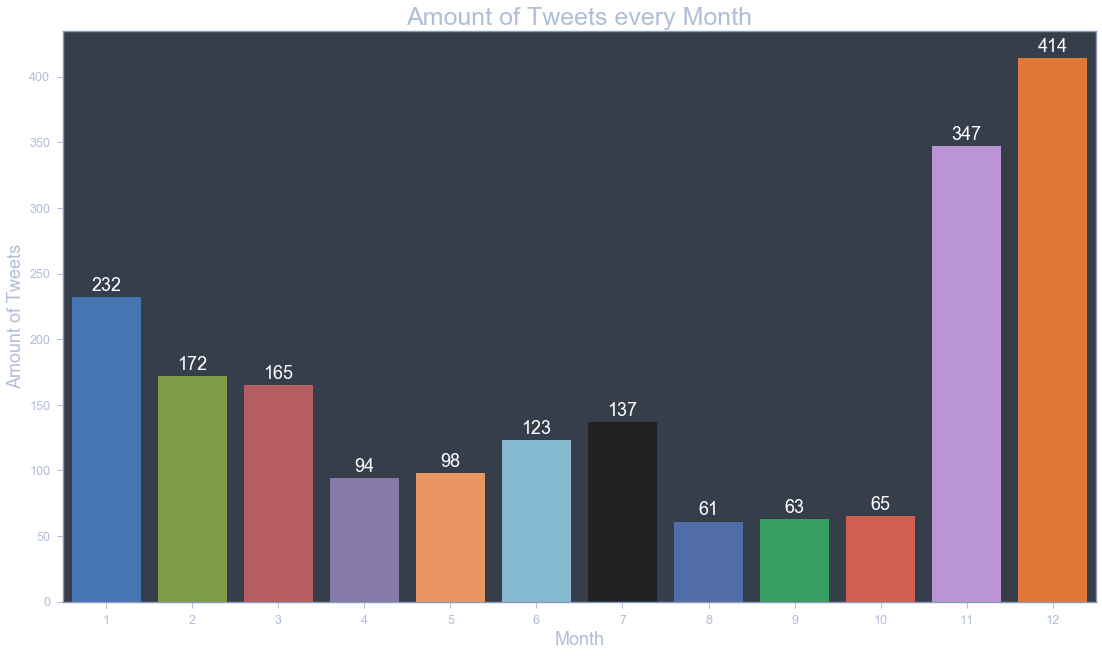

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

f, a = plt.subplots()
f.set_size_inches(18.5, 10.5)
a = sns.barplot(x='timestamp', y='rating_numerator', data=grouped_month)
for index, row in grouped_month.iterrows():
    a.text(row.timestamp-1, row.rating_numerator+5,
           row.rating_numerator, color='white', ha="center", fontsize=18)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Amount of Tweets", fontsize=18)
plt.title("Amount of Tweets every Month", fontsize=25);

It looks like the admin tweets so much in November and December. Maybe winter is coming. In the mid-year, they seemed not as active as they were in the winter season. If you want to look at so much WeRateDogs tweets in the future, just wait until winter.

## Which dog name is the most and least mentioned on WeRateDogs tweets?

Now, let's see which name is the most and least shown on tweets

In [74]:
df['name'].value_counts()

ChNonerlie    11
Lucy          10
Cooper        10
Oliver        10
Tucker         9
              ..
Smiley         1
Jett           1
Steve          1
CNoneryl       1
Mike           1
Name: name, Length: 933, dtype: int64

Whoops. Looks like I didn't clean this data. Take a look at the most shown name, ChNonerlie. I'm not sure if that's a real name of a dog. Let's take a look the real name of the dog by looking at the tweet

In [64]:
df[df['name']=='ChNonerlie']['text']

192     This is Charlie. He wants to know if you have ...
197     This is Charlie. He's wishing you a very fun a...
241     Meet Charlie. She asked u to change the channe...
249     This is Charlie. He fell asleep on a heating v...
284     This is Charlie. He wins every game of chess h...
588     This is Charlie. He works for @TODAYshow. Supe...
684     This is Charlie. He pouts until he gets to go ...
1051    This is Charlie. He's a West Side Niddlewog. M...
1123    Meet Charlie. He likes to kiss all the big mil...
1331    Say hello to Charlie. He's scholarly af. Quite...
1671    This is Charlie. He was just informed that dog...
Name: text, dtype: object

As you can see, his name is Charlie. Well, this proves that Data Wrangling can be iterated. We can always fix it in the future though.  
Now let's find which name is the least mentioned in the tweets

In [65]:
df.groupby("name").filter(lambda x: len(x) == 1)['name']

1             Tilly
3       DNonerlNone
11            Bruno
14        StuNonert
16              Jim
           ...     
1918       CNonerll
1924        Jockson
1927          Josep
1928       LugNonen
1930     Christoper
Name: name, Length: 705, dtype: object

Well we found a lot of name that was mentioned only once, and a lot of dirty data. At least now we know that the word "None" should be replaced as "a" (e.g ChNonerlie => Charlie, CNonerll => Carll).  
But the most important insight here, Charlie is the most mentioned one and there are 705 other dogs only mentioned once

## How many dogs rated below and over its denominator?

You see, the uniqueness of WeRateDogs is on their rating numerator is over than its denominator. But I'd like whether most of the ratings are higher or lower than its denominator. Let's compare it

In [66]:
below_over_ratings = []
for index,row in df[['rating_numerator','rating_denominator']].iterrows():
    if(row['rating_numerator']>row['rating_denominator']):
        below_over_ratings.append("Over")
    else:
        below_over_ratings.append("Below")

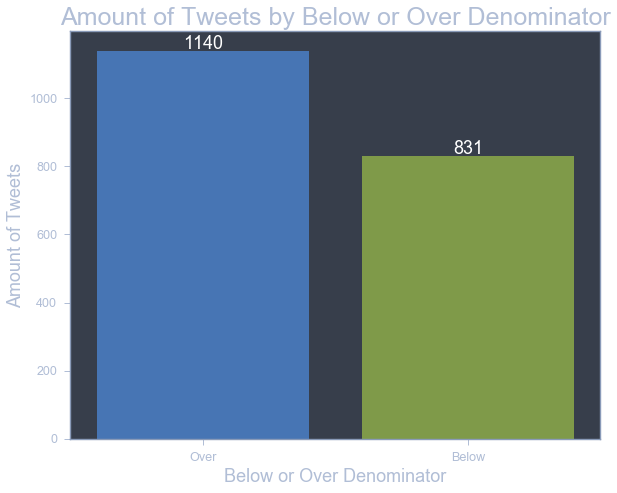

In [67]:
f, a = plt.subplots()
f.set_size_inches(9.5, 7.5)
a = sns.countplot(below_over_ratings)
below_count = below_over_ratings.count("Below")
over_count = below_over_ratings.count("Over")
a.text(0, over_count+5,over_count, color='white', ha="center", fontsize=18)
a.text(1, below_count+5,below_count, color='white', ha="center", fontsize=18)
plt.xlabel("Below or Over Denominator", fontsize=18)
plt.ylabel("Amount of Tweets", fontsize=18)
plt.title("Amount of Tweets by Below or Over Denominator", fontsize=25);

Let's take a look on their proportion

In [68]:
print("Below Denominator Proportion : ",below_count / len(below_over_ratings))
print("Over Denominator Proportion : ",over_count / len(below_over_ratings))

Below Denominator Proportion :  0.4216133942161339
Over Denominator Proportion :  0.578386605783866


So, most of the ratings are over its denominator. Well, it's interesting that the below one isn't that much of difference. Now we know that their uniqueness is actually by giving ratings over their denominators

# Conclusion

Assessing data take a lot of times, especially when you need to create the documentation. But the effort is worth it for future analysis. Data Wrangling I did isn't actually done yet, and always can be continued from this point. Data Wrangling is iterative, so doing from the begining to make sure everything is tidy and clean is urged.  
After I did an analysis on finding which name is the most mentioned, I didn't clean the `name` column which reflects to the final analysis. Always remember to do Data Wrangling before doing analysis!

Thanks to Udacity for this awesome project!